In [25]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

In [83]:
model =tree.DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=4)

In [84]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       151
           1       0.58      0.75      0.65        80

    accuracy                           0.72       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.75      0.72      0.73       231



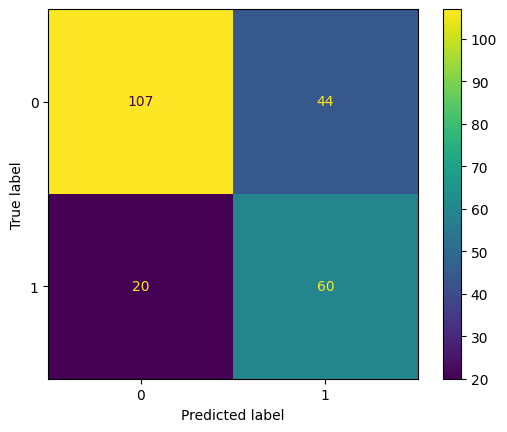

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

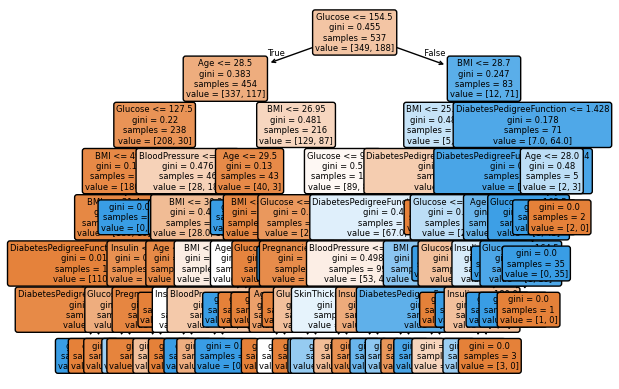

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names=list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

In [97]:
def name_sorter(mylist):
    namestring = ""
    lenlist = len(mylist)
    counter = 1
    for name in mylist:
        if counter < lenlist and counter != 1:
            namestring = f"{namestring}, {name}"
            counter += 1
        elif counter == 1:
            namestring = f"{name}"
            counter += 1
        else:
            namestring = f"{namestring} & {name}"
    print(namestring)

In [98]:
namelist = ["Tony", "Garlo", "Tim", "Terry",]
name_sorter(namelist)

Tony, Garlo, Tim & Terry
